In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)

logreg.score(X_test, y_test)

0.88

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

cross_val_score(logreg, iris.data, iris.target)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [4]:
cross_val_score(logreg, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [5]:
cross_val_score(logreg, iris.data, iris.target).mean()

0.9733333333333334

In [9]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.06192565, 0.10051799, 0.04488015, 0.04089022, 0.04307175]),
 'score_time': array([0.00099802, 0.        , 0.        , 0.00099826, 0.00088263]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [10]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.061926,0.000998,0.966667,0.966667
1,0.100518,0.000000,1.000000,0.966667
2,0.044880,0.000000,0.933333,0.983333
3,0.040890,0.000998,0.966667,0.983333
4,0.043072,0.000883,1.000000,0.975000


In [11]:
res_df.mean()

fit_time       0.058257
score_time     0.000576
test_score     0.973333
train_score    0.975000
dtype: float64

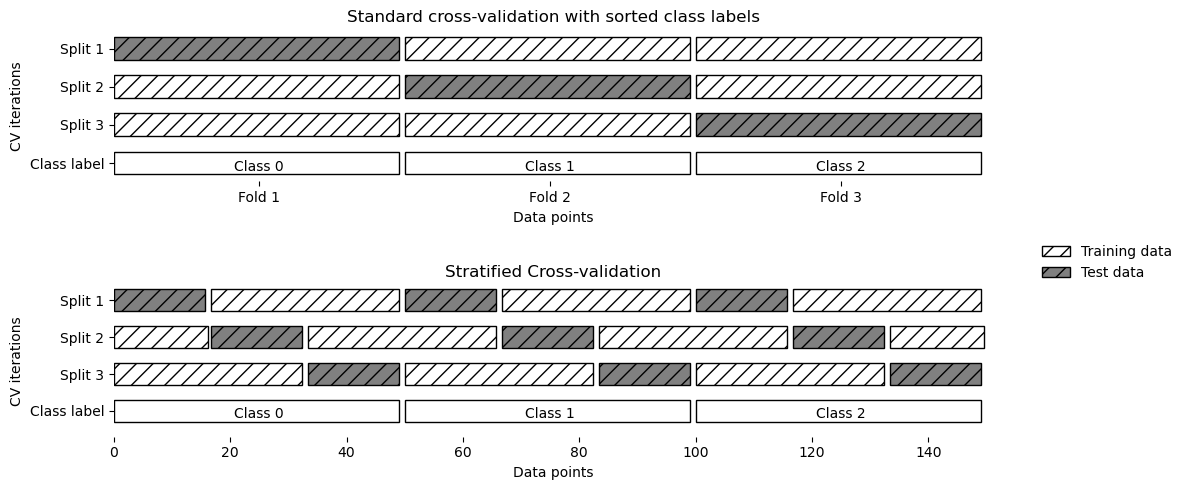

In [12]:
mglearn.plots.plot_stratified_cross_validation()

In [13]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [14]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [15]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [16]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.96])

In [17]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

len(scores), scores.mean()

(150, 0.9666666666666667)

In [18]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

scores

array([0.96      , 0.92      , 1.        , 0.97333333, 0.98666667,
       0.94666667, 0.97333333, 0.97333333, 0.93333333, 0.96      ])

In [19]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))

scores

array([0.75      , 0.6       , 0.66666667])

In [20]:
from sklearn.model_selection import StratifiedKFold

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

scores, scores.mean()

(array([1.        , 0.96666667, 0.93333333, 1.        , 0.93333333,
        0.96666667, 0.96666667, 0.93333333, 1.        , 0.96666667,
        0.93333333, 1.        , 1.        , 0.96666667, 0.96666667,
        0.9       , 1.        , 1.        , 0.93333333, 0.96666667,
        0.93333333, 0.96666667, 0.96666667, 1.        , 0.96666667,
        1.        , 0.96666667, 0.96666667, 0.9       , 1.        ,
        0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
        0.96666667, 0.96666667, 1.        , 1.        , 0.9       ,
        0.96666667, 1.        , 0.9       , 0.96666667, 0.96666667,
        0.9       , 0.96666667, 0.96666667, 1.        , 0.96666667]),
 0.9646666666666667)

In [23]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train.shape[0], X_test.shape[0]

(112, 38)

In [24]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [25]:
best_score

0.9736842105263158

In [26]:
best_parameters

{'C': 100, 'gamma': 0.001}

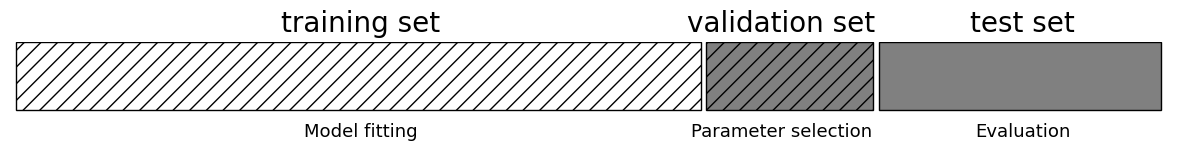

In [27]:
mglearn.plots.plot_threefold_split()

In [28]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

X_train.shape[0], X_valid.shape[0], X_test.shape[0]

(84, 28, 38)

In [29]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_valid, y_valid)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [30]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)

In [32]:
best_score, best_parameters

(0.9642857142857143, {'C': 10, 'gamma': 0.001})

In [33]:
test_score

0.9210526315789473

In [34]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

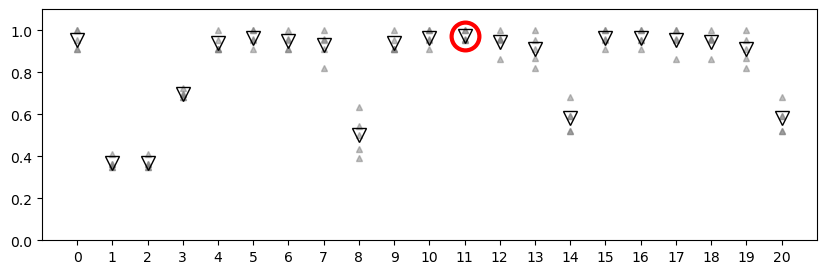

In [35]:
mglearn.plots.plot_cross_val_selection()

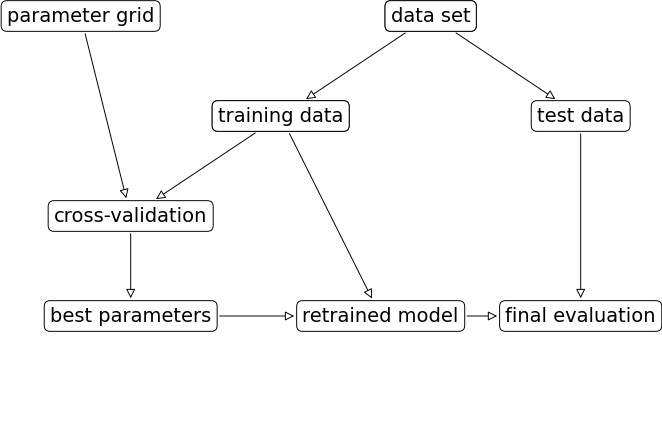

In [36]:
mglearn.plots.plot_grid_search_overview()

In [38]:
param_grid = {
    'C': [10**x for x in range(-3, 3)],
    'gamma': [10**x for x in range(-3, 3)]
}

param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [39]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [42]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [43]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [45]:
grid_search.best_score_

0.9731225296442687

In [46]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [47]:
pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.00225,0.002765,0.00401,0.001995,0.002462
std_fit_time,0.000745,0.00055,0.00309,0.000631,0.000408
mean_score_time,0.001339,0.001425,0.001774,0.000603,0.001209
std_score_time,0.000549,0.000623,0.000767,0.000493,0.000393
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


In [49]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.00225,0.002765,0.00401,0.001995,0.002462,0.0024,0.001869,0.001985,0.002372,0.002319,0.002835,0.0032,0.002849,0.002993,0.002194,0.001989,0.001991,0.001675,0.0023,0.001284,0.001197,0.001591,0.00306,0.004254,0.002632,0.002389,0.002135,0.002721,0.003283,0.004061,0.001794,0.001625,0.001185,0.001752,0.003302,0.0028
std_fit_time,0.000745,0.00055,0.00309,0.000631,0.000408,0.000794,0.000462,0.000634,0.000453,0.000396,0.000295,0.000391,0.000441,0.000632,0.000397,0.00064,0.000061,0.000411,0.000412,0.000295,0.000399,0.000485,0.000749,0.000387,0.000446,0.000493,0.000441,0.000742,0.00051,0.001019,0.000379,0.000513,0.000376,0.00032,0.0008,0.000406
mean_score_time,0.001339,0.001425,0.001774,0.000603,0.001209,0.001191,0.00092,0.000797,0.000851,0.000888,0.001233,0.001968,0.000941,0.001597,0.001406,0.000798,0.001033,0.000953,0.000493,0.000951,0.000606,0.000994,0.001319,0.00213,0.000967,0.001197,0.000852,0.001522,0.001738,0.001529,0.000815,0.000999,0.000996,0.000788,0.001676,0.001396
std_score_time,0.000549,0.000623,0.000767,0.000493,0.000393,0.000388,0.000155,0.000399,0.000342,0.000223,0.000451,0.000633,0.00064,0.000798,0.0005,0.000399,0.000074,0.000186,0.000454,0.00007,0.000495,0.000022,0.000658,0.000449,0.000091,0.000399,0.000695,0.00045,0.000298,0.000669,0.000409,0.000063,0.000022,0.000394,0.000622,0.000488
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}","{'C': 0.01, 'gamma': 10}","{'C': 0.01, 'gamma': 100}","{'C': 0.1, 'gamma': 0.001}","{'C': 0.1, 'gamma': 0.01}","{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1}","{'C': 0.1, 'gamma': 10}","{'C': 0.1, 'gamma': 100}","{'C': 1, 'gamma': 0.001}","{'C': 1, 'gamma': 0.01}","{'C': 1, 'gamma': 0.1}","{'C': 1, 'gamma': 1}","{'C': 1, 'gamma': 10}","{'C': 1, 'gamma': 100}","{'C': 10, 'gamma': 0.001}","{'C': 10, 'gamma': 0.01}","{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,1.0,0.347826,0.347826,0.695652,0.913043,1.0,0.956522,0.913043,0.391304,0.913043,1.0,1.0,0.956522,0.869565,0.521739,1.0,1.0,1.0,0.956522,0.869565,0.521739
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,0.913043,0.347826,0.347826,0.695652,0.913043,0.956522,0.913043,0.956522,0.434783,0.913043,0.956522,0.956522,0.956522,0.913043,0.521739,0.956522,0.913043,0.956522,0.956522,0.913043,0.521739
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.681818,0.909091,1.0,0.363636,0.363636,0.681818,1.0,1.0,1.0,1.0,0.545455,1.0,1.0,1.0,1.0,1.0,0.590909,1.0,1.0,1.0,1.0,1.0,0.590909


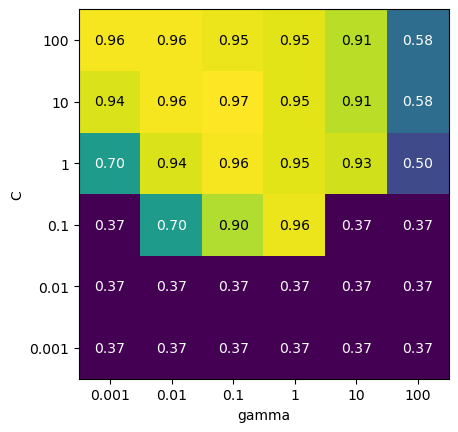

In [50]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(
    scores,
    xlabel='gamma', xticklabels=param_grid['gamma'], 
    ylabel='C', yticklabels=param_grid['C'],
    cmap='viridis'
)

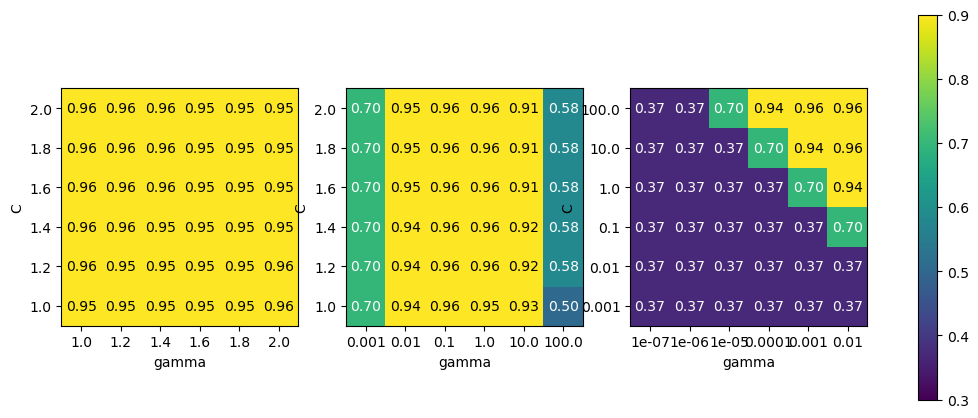

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.linspace(1, 2, 6)
}

param_grid_one_log = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.logspace(-3, 2, 6)
}

param_grid_range = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-7, -2, 6)
}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(
        scores,
        xlabel='gamma', xticklabels=param_grid['gamma'], 
        ylabel='C', yticklabels=param_grid['C'],
        cmap='viridis', ax=ax, vmin=0.3, vmax=0.9
    )

plt.colorbar(scores_image, ax=axes.tolist())

In [59]:
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [10**x for x in range(-3, 3)],
        'gamma': [10**x for x in range(-3, 3)]
    },
    {
        'kernel': ['linear'],
        'C': [10**x for x in range(-3, 3)]
    }
]

param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [60]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9731225296442687)

In [61]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00217,0.002128,0.003632,0.002393,0.002622,0.002746,0.001586,0.001843,0.001627,0.002194,0.002799,0.002755,0.0026,0.002527,0.002493,0.003186,0.002792,0.002413,0.002776,0.002357,0.001637,0.002216,0.003591,0.003125,0.001796,0.001809,0.001014,0.002255,0.002393,0.003184,0.001715,0.001056,0.001485,0.002187,0.00349,0.003046,0.001899,0.001542,0.001005,0.001405,0.001396,0.00158
std_fit_time,0.00022,0.000968,0.000961,0.001353,0.000533,0.000798,0.000481,0.000433,0.000517,0.000399,0.000404,0.000387,0.000811,0.000789,0.000771,0.000729,0.000746,0.000794,0.000735,0.000522,0.000527,0.000743,0.00049,0.000459,0.000399,0.000407,0.000037,0.000502,0.000489,0.000386,0.000401,0.000135,0.000458,0.001151,0.000788,0.000641,0.000118,0.000492,0.000015,0.000513,0.00049,0.000473
mean_score_time,0.001641,0.002278,0.001789,0.001197,0.001351,0.000997,0.001206,0.000949,0.000766,0.001196,0.000982,0.001391,0.001381,0.001595,0.001459,0.000969,0.001995,0.001596,0.001358,0.001396,0.000757,0.001167,0.001381,0.00118,0.001013,0.000776,0.000987,0.000598,0.001423,0.001199,0.000886,0.000804,0.00052,0.000998,0.001716,0.001599,0.000798,0.000961,0.001,0.00059,0.000622,0.000399
std_score_time,0.000365,0.001484,0.000745,0.000399,0.000446,0.0,0.000395,0.000095,0.000388,0.000399,0.000031,0.000497,0.000487,0.000505,0.000452,0.000056,0.001093,0.000489,0.000467,0.000488,0.000386,0.000416,0.000469,0.000384,0.000033,0.00039,0.000022,0.000488,0.000472,0.000398,0.000222,0.000402,0.000448,0.000002,0.000615,0.000794,0.000399,0.000076,0.000005,0.000482,0.000509,0.000489
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 

In [63]:
param_grid = {
    'C': [10**x for x in range(-3, 3)],
    'gamma': [10**x for x in range(-3, 3)]
}

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

scores, scores.mean()

(array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 0.9800000000000001)

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist = [
    {
        'kernel': ['rbf'],
        'C': loguniform(0.001, 100),
        'gamma': loguniform(0.001, 100)
    },
    {
        'kernel': ['linear'],
        'C': loguniform(0.001, 100)
    }
]

In [65]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C8CA3701F0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C8CA216610>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C8CA4B99A0>,
                                         'kernel': ['linear']}],
                   random_state=42)

In [66]:
rand_search.best_params_, rand_search.best_score_

({'C': 1.7965626423790642, 'kernel': 'linear'}, 0.9731225296442687)

In [68]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {
        'kernel': ['rbf'],
        'C': [10**x for x in range(-3, 3)],
        'gamma': [10**x for x in range(-3, 3)]
    },
    {
        'kernel': ['linear'],
        'C': [10**x for x in range(-3, 3)]
    }
]

halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose=1, random_state=42, n_jobs=-1)
halv_search.fit(X_train, y_train)

halv_search.best_params_, halv_search.best_score_

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits


({'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 0.9653594771241831)

In [69]:
halv_search.n_candidates_, halv_search.n_resources_

([42, 14], [30, 90])

In [70]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [72]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

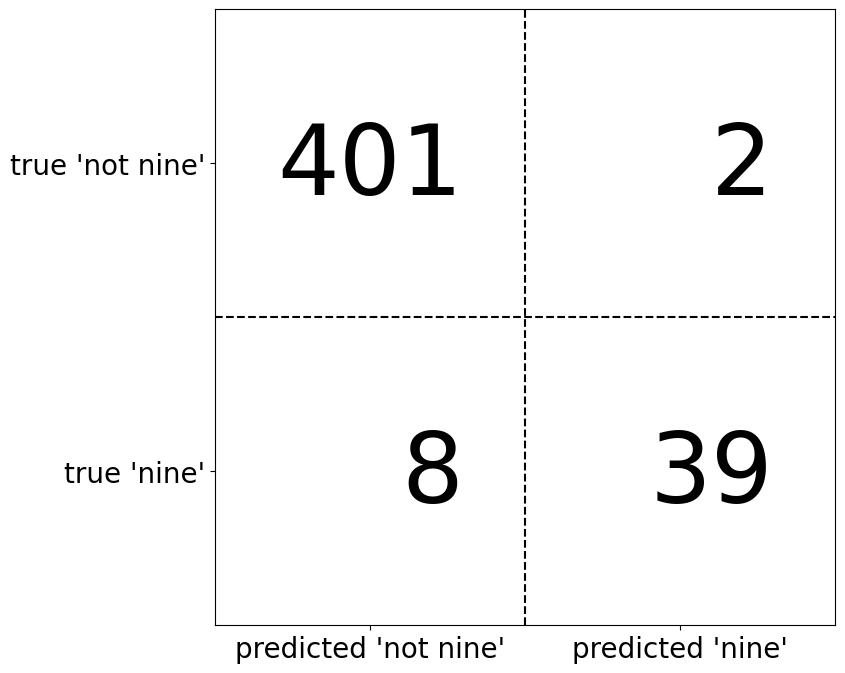

In [74]:
mglearn.plots.plot_confusion_matrix_illustration()

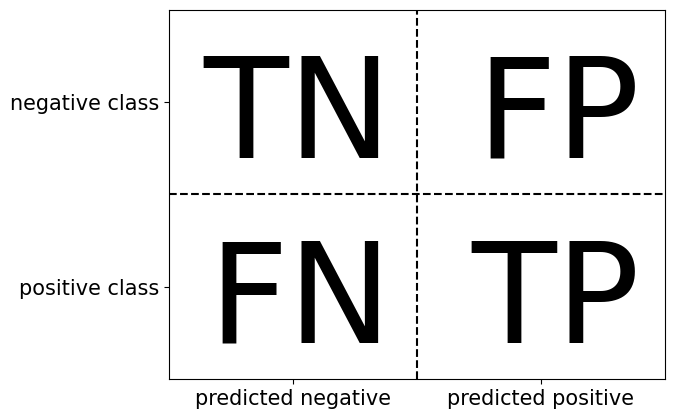

In [75]:
mglearn.plots.plot_binary_confusion_matrix()

In [76]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [77]:
confusion_matrix(y_test, pred_most_frequent)

array([[403,   0],
       [ 47,   0]], dtype=int64)

In [78]:
confusion_matrix(y_test, pred_dummy)

array([[364,  39],
       [ 41,   6]], dtype=int64)

In [79]:
confusion_matrix(y_test, pred_tree)

array([[390,  13],
       [ 24,  23]], dtype=int64)

In [80]:
confusion_matrix(y_test, pred_logreg)

array([[402,   1],
       [  6,  41]], dtype=int64)

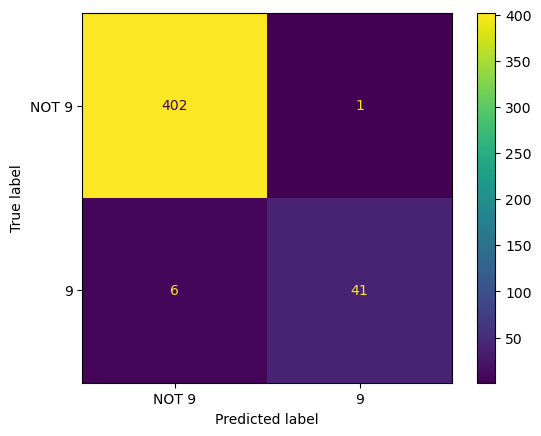

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['NOT 9', '9'])